In [34]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import seaborn as sns

# Load the dataset
data = pd.read_csv('C:/Users/Jaffar/Downloads/ai_adoption.csv')


# Preview the dataset
print("Dataset Head:")
print(data.head())

Dataset Head:
               Job_Title       Industry Company_Size   Location  \
0  Cybersecurity Analyst  Entertainment        Small      Dubai   
1   Marketing Specialist     Technology        Large  Singapore   
2          AI Researcher     Technology        Large  Singapore   
3          Sales Manager         Retail        Small     Berlin   
4  Cybersecurity Analyst  Entertainment        Small      Tokyo   

  AI_Adoption_Level Automation_Risk     Required_Skills     Salary_USD  \
0            Medium            High        UX/UI Design  111392.165243   
1            Medium            High           Marketing   93792.562466   
2            Medium            High        UX/UI Design  107170.263069   
3               Low            High  Project Management   93027.953758   
4               Low             Low          JavaScript   87752.922171   

  Remote_Friendly Job_Growth_Projection  
0             Yes                Growth  
1              No               Decline  
2           

In [19]:
# Check for missing values
#print("\nMissing Values:")
#print(data.isnull().sum())

# Sort the DataFrame (for example, by Industry and AI_Adoption_Level)
sorted_df = data.sort_values(by=['Industry', 'AI_Adoption_Level'])

# Select relevant columns to display
display_df = sorted_df[['Industry', 'AI_Adoption_Level', 'Automation_Risk', 'Job_Growth_Projection']]

# Display the DataFrame
print(display_df)

           Industry AI_Adoption_Level Automation_Risk Job_Growth_Projection
50        Education              High          Medium                Stable
54        Education              High             Low               Decline
83        Education              High             Low                Stable
101       Education              High             Low                Growth
121       Education              High             Low                Growth
..              ...               ...             ...                   ...
234  Transportation            Medium             Low                Stable
288  Transportation            Medium            High                Growth
429  Transportation            Medium             Low                Growth
457  Transportation            Medium            High                Growth
494  Transportation            Medium            High                Growth

[500 rows x 4 columns]


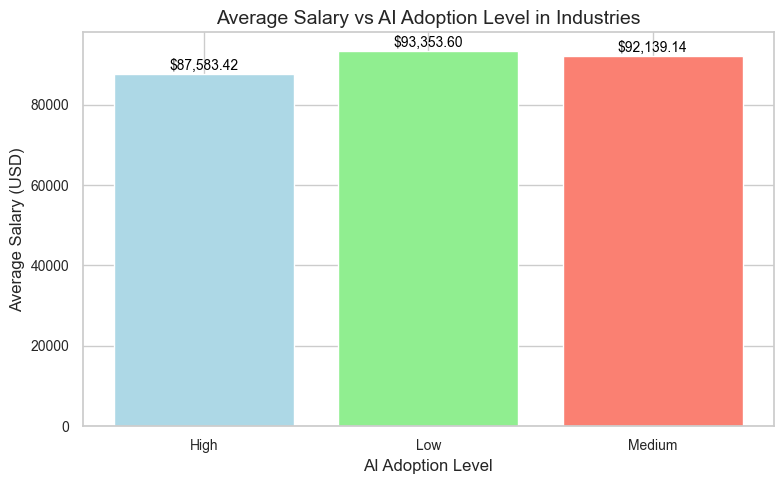

In [18]:
data = pd.read_csv('C:/Users/Jaffar/Downloads/ai_adoption.csv')

# Analysis: Average Salary vs AI Adoption Level
salary_vs_ai_adoption = data.groupby('AI_Adoption_Level')['Salary_USD'].mean().sort_index()

# Bar Plot: Average Salary vs AI Adoption Level
plt.figure(figsize=(8, 5))
plt.bar(salary_vs_ai_adoption.index, salary_vs_ai_adoption.values, color=['lightblue', 'lightgreen', 'salmon'])

# Adding labels and title
plt.title('Average Salary vs AI Adoption Level in Industries', fontsize=14)
plt.xlabel('AI Adoption Level', fontsize=12)
plt.ylabel('Average Salary (USD)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adding value annotations on the bars
for i, value in enumerate(salary_vs_ai_adoption.values):
    plt.text(i, value + 1000, f"${value:,.2f}", ha='center', fontsize=10, color='black')

# Display the plot
plt.tight_layout()
plt.show()


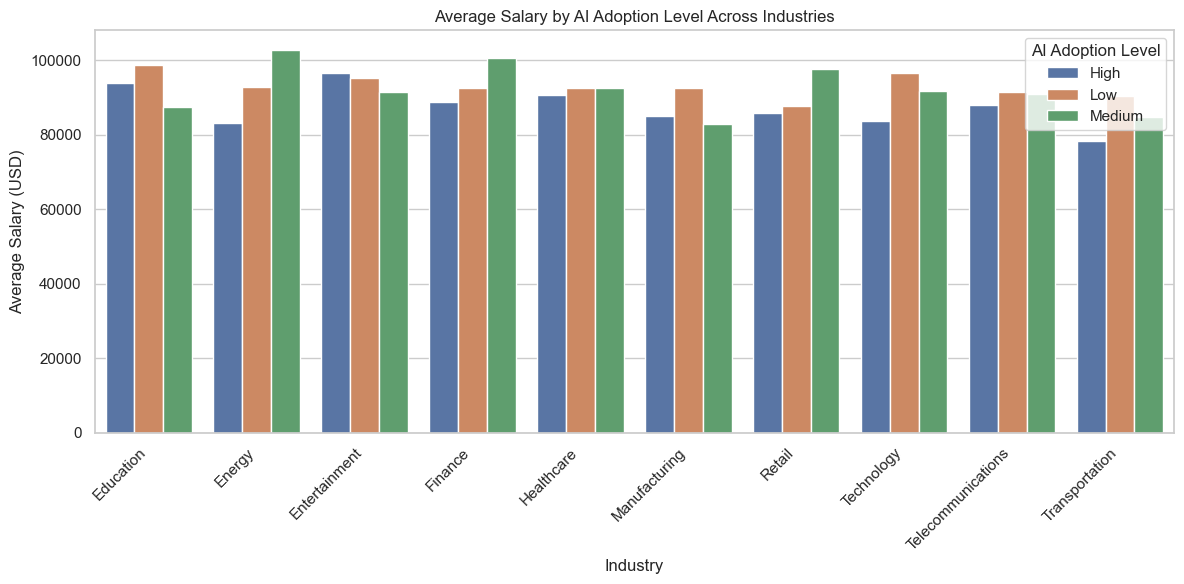

In [17]:
# Convert categorical columns to category type for better analysis
data['AI_Adoption_Level'] = data['AI_Adoption_Level'].astype('category')
data['Automation_Risk'] = data['Automation_Risk'].astype('category')
data['Job_Growth_Projection'] = data['Job_Growth_Projection'].astype('category')
data['Remote_Friendly'] = data['Remote_Friendly'].astype('category')

# Visualization 1: Average salary by AI adoption level across industries (Bar Plot)
plt.figure(figsize=(12, 6))
salary_adoption = data.groupby(['Industry', 'AI_Adoption_Level'], observed=False)['Salary_USD'].mean().reset_index()

sns.barplot(x='Industry', y='Salary_USD', hue='AI_Adoption_Level', data=salary_adoption)
plt.xticks(rotation=45, ha='right')
plt.title('Average Salary by AI Adoption Level Across Industries')
plt.xlabel('Industry')
plt.ylabel('Average Salary (USD)')
plt.legend(title='AI Adoption Level')
plt.tight_layout()
plt.show()


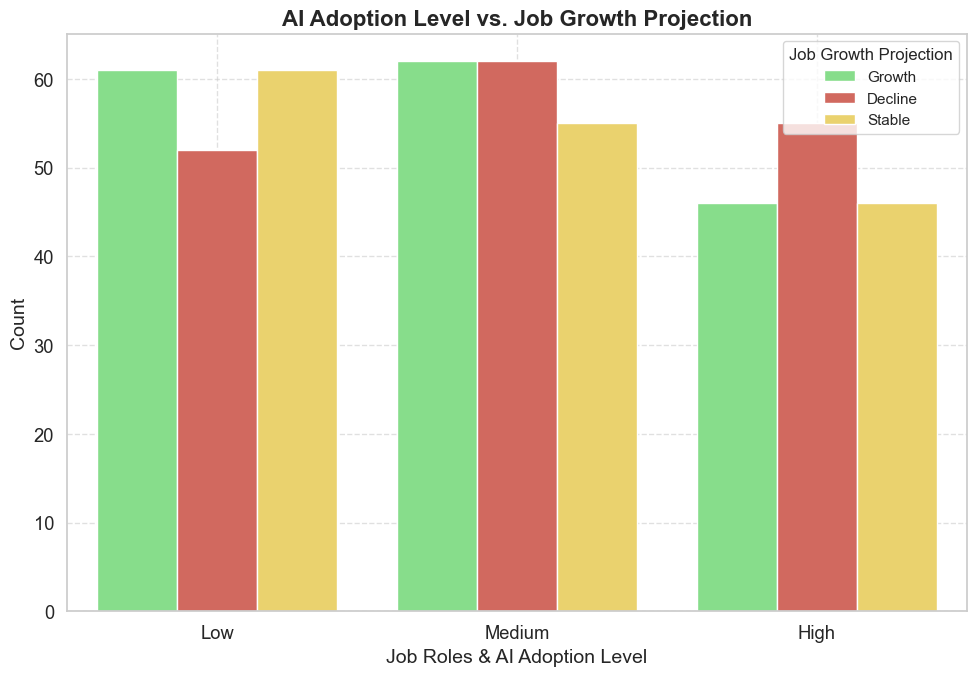

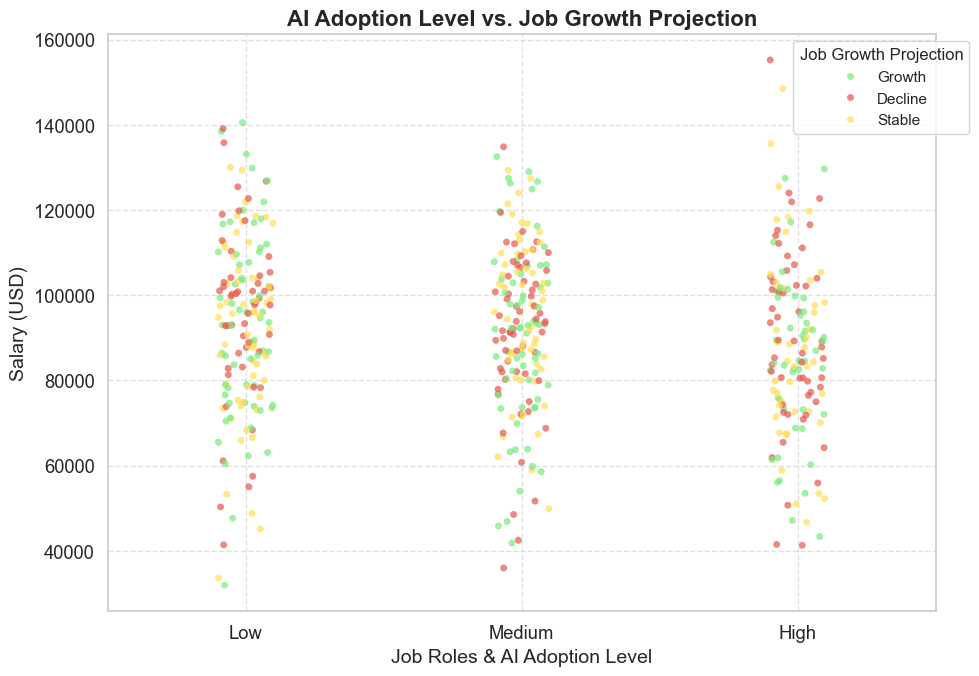

In [35]:
# Visualization 2: AI adoption level vs. job growth projection (Bar Plot)
custom_palette = {'Growth': '#79EB7E',  # Green for growth
                  'Decline': '#E4594C',  # Red for decline
                  'Stable': '#FFDE59'}  # Yellow for stable

# Plot the countplot with custom colors
plt.figure(figsize=(10, 7))
sns.countplot(x='AI_Adoption_Level', hue='Job_Growth_Projection', data=data, palette=custom_palette)

# Customize the title and labels with larger font size and clearer fonts
plt.title('AI Adoption Level vs. Job Growth Projection', fontsize=16, fontweight='bold')
plt.xlabel('Job Roles & AI Adoption Level', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Customize the legend
plt.legend(title='Job Growth Projection', title_fontsize=12, fontsize=11, loc='upper right')

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust layout to ensure labels are not cut off
plt.tight_layout()
plt.show()

# Visualization 2 (Scatterplot): AI Adoption Level vs. Job Growth Projection
plt.figure(figsize=(10, 7))
sns.stripplot(x='AI_Adoption_Level', y='Salary_USD', hue='Job_Growth_Projection', data=data, jitter=True, alpha=0.7, palette=custom_palette)

# Customize the title and labels with larger font size and clearer fonts
plt.title('AI Adoption Level vs. Job Growth Projection', fontsize=16, fontweight='bold')
plt.xlabel('Job Roles & AI Adoption Level', fontsize=14)
plt.ylabel('Salary (USD)', fontsize=14)

# Customize the legend
plt.legend(title='Job Growth Projection', title_fontsize=12, fontsize=11, loc='upper right', bbox_to_anchor=(1.05, 1))

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust layout to ensure labels are not cut off
plt.tight_layout()
plt.show()


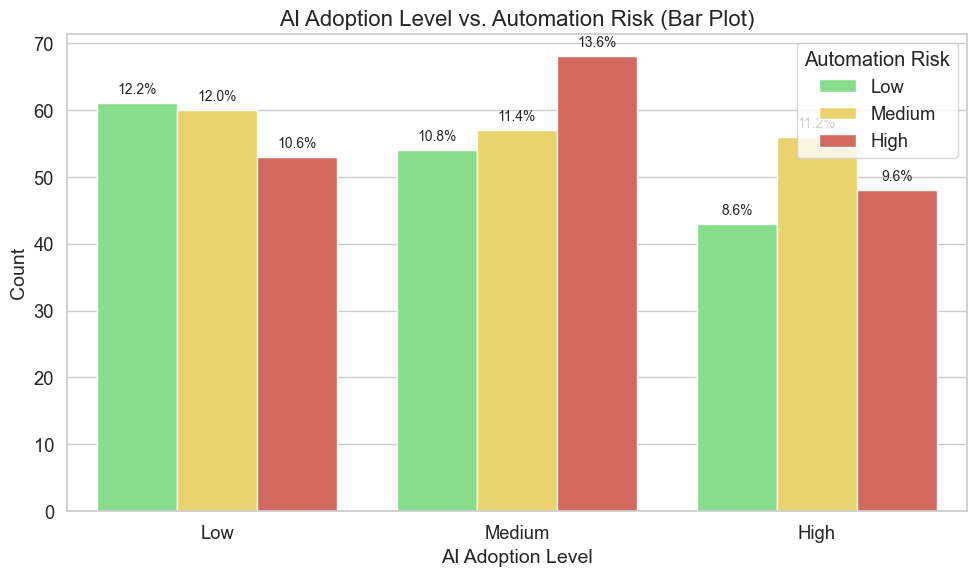

Cleaned dataset saved to: C:/Users/Jaffar/Downloads/cleaned_ai_adoption.csv with 500 rows and 10 columns.


In [24]:
# Reorder categories for meaningful display
data['AI_Adoption_Level'] = pd.Categorical(data['AI_Adoption_Level'], categories=['Low', 'Medium', 'High'], ordered=True)
data['Automation_Risk'] = pd.Categorical(data['Automation_Risk'], categories=['Low', 'Medium', 'High'], ordered=True)

# Set a consistent style
sns.set(style='whitegrid', font_scale=1.2)

# Define the custom color palette
custom_palette = {'Low': '#79EB7E',  # Green for Growth
                  'Medium': '#FFDE59',  # Yellow for Stable
                  'High': '#E4594C'}  # Red for Decline

# ------------------ Enhanced Bar Plot ------------------
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='AI_Adoption_Level', hue='Automation_Risk', data=data, palette=custom_palette)

# Add percentage labels on the bars
total_counts = data['AI_Adoption_Level'].value_counts()
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  # Avoid displaying percentages for zero counts
            percentage = f'{(height / total_counts.sum()):.1%}'
            ax.text(
                bar.get_x() + bar.get_width() / 2, height + 1, percentage, ha='center', va='bottom', fontsize=10
            )

# Add titles and labels
plt.title('AI Adoption Level vs. Automation Risk (Bar Plot)', fontsize=16)
plt.xlabel('AI Adoption Level', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Automation Risk', loc='upper right')
plt.tight_layout()
plt.show()



# ------------------ Save Cleaned Dataset ------------------
cleaned_file_path = 'C:/Users/Jaffar/Downloads/cleaned_ai_adoption.csv'
data.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved to: {cleaned_file_path} with {len(data)} rows and {len(data.columns)} columns.")


['Medium' 'Low' 'High']


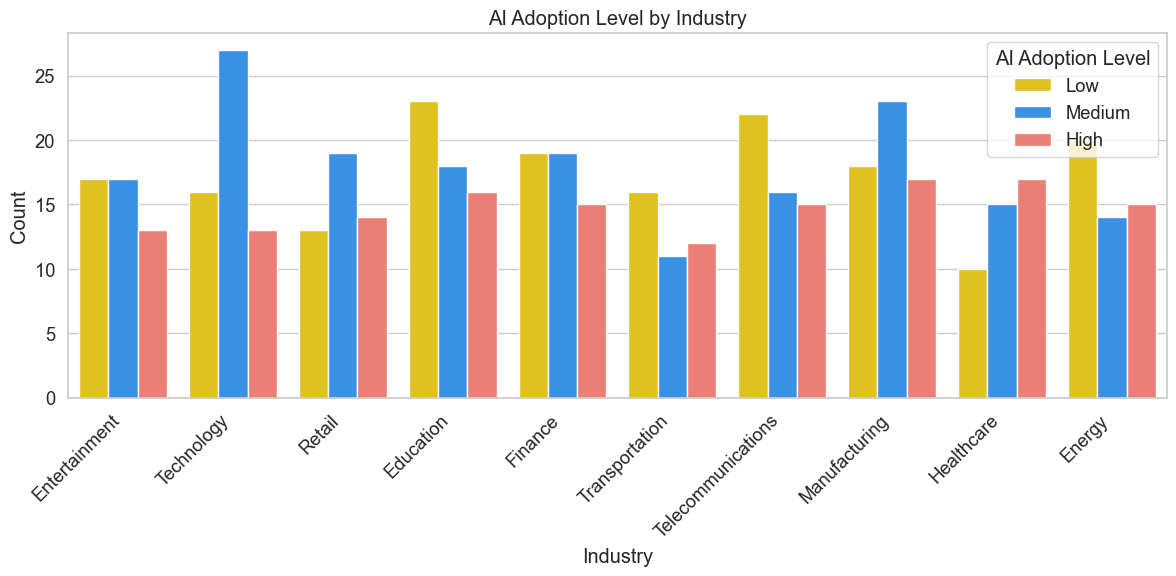

In [32]:
# Verify unique values in AI_Adoption_Level
print(df['AI_Adoption_Level'].unique())

# Define the custom color palette
# Define the custom color palette
custom_palette = {
    'Low': '#FFD700',    # Pastel Coral 
    'Medium': '#1E90FF', # Sky Blue
    'High': '#FF6F61'    # Lemon Yellow 
}


# Grouped Bar Chart: AI Adoption by Industry
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df, 
    x='Industry', 
    hue='AI_Adoption_Level', 
    palette=custom_palette, 
    hue_order=['Low', 'Medium', 'High']
)
plt.title('AI Adoption Level by Industry')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.legend(title='AI Adoption Level', loc='upper right')
plt.tight_layout()
plt.show()

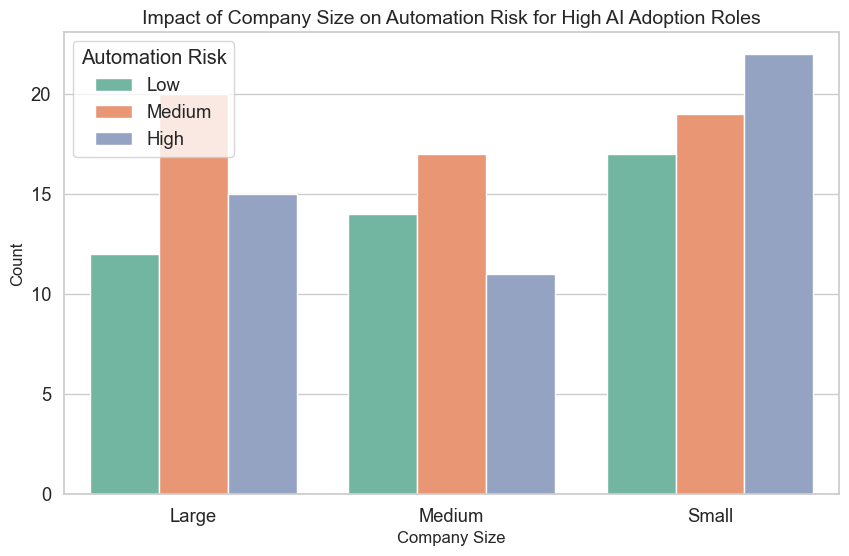

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

df = pd.read_csv('C:/Users/Jaffar/Downloads/ai_adoption.csv')

# Filter data for roles with high AI adoption levels
high_ai_adoption = data[data['AI_Adoption_Level'] == 'High']

# Group data by Company Size and Automation Risk
company_size_risk = high_ai_adoption.groupby(['Company_Size', 'Automation_Risk'], observed=False).size().reset_index(name='Count')

# Plot: Impact of Company Size on Automation Risk
plt.figure(figsize=(10, 6))
sns.barplot(data=company_size_risk, x='Company_Size', y='Count', hue='Automation_Risk', palette='Set2')
plt.title('Impact of Company Size on Automation Risk for High AI Adoption Roles', fontsize=14)
plt.xlabel('Company Size', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Automation Risk')
plt.show()




In [25]:
# Insights: Automation Risk Across Company Sizes

automation_risk = {
    "Small Companies": [
        "Higher proportion of roles categorized under 'High' automation risk."
    ],
    "Medium Companies": [
        "Balanced distribution between high and low automation risk roles."
    ],
    "Large Companies": [
        "Lower automation risk due to:",
        "- Diversified roles",
        "- Resources for upskilling employees",
        "- Advanced technological capabilities"
    ]
}

# Impact
impact = [
    "Smaller companies are more vulnerable to job losses due to automation.",
    "Larger companies can leverage AI to augment roles, reducing the risk of job displacement."
]

# Printing insights and impact
print("Automation Risk Across Company Sizes:")
for company_size, risks in automation_risk.items():
    print(f"\n{company_size}:")
    for risk in risks:
        print(f"- {risk}")

print("\nImpact:")
for point in impact:
    print(f"- {point}")


Automation Risk Across Company Sizes:

Small Companies:
- Higher proportion of roles categorized under 'High' automation risk.

Medium Companies:
- Balanced distribution between high and low automation risk roles.

Large Companies:
- Lower automation risk due to:
- - Diversified roles
- - Resources for upskilling employees
- - Advanced technological capabilities

Impact:
- Smaller companies are more vulnerable to job losses due to automation.
- Larger companies can leverage AI to augment roles, reducing the risk of job displacement.
